# Overview
This is an Unsupervised machine learning problem on an Online Retail business case. In this project, we will implement one of the most common applications of machine learning known as " Customer Segmentation". We will give a brief introduction to what customer segmentation is, it's application and so many other useful tips to help learn more about this problem.

* ### Definition:
Segmentation is a way of grouping features into groups/clusters based on similarities.Clustering is the technique used in grouping features(products,customers, markets etc) into forms based on the fact that they share similar attributes while segmentation is a business case.

* ### Applications:
    * Customer Segmentation
    * Marketing
    * Social Media
    * Medical domain and so on.
    
As discussed earlier, this problem is a Customer Segmentation problem.

* ### Customer Segmentation:
Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.

## Description:
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. This unlabelled dataset contains 541909 instances and 8 features or fields.

Link to (download) the data set:https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

## Meta-Data:

#### Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

** Just a break**

## Steps taken to complete this project

* Importing the neccesary packages/libraries
* Reading the data set into pandas dataframe
* Feature Engineering, selection  and analysis
* Feature Scaling
* Determine the value of K-Clusters 
* Carry out EDA( Exploratory Data Analysis) to understand our data


##  * Importing the neccesary packages/libraries

In [1]:
# importing the necessary tools/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling library for Kmeans clustering
from sklearn.cluster import KMeans

## * Reading the data set into pandas dataframe

In [2]:
#reading the dataset into a pandas dataframe, the "low_memory" argument is taking as false as to preserve the data types across the dataset uniform
online=pd.read_csv('Online Retail.csv',low_memory=False)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
online.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
# Checking the info about the dataset
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# let's check the percentage of missing values for each columns in the dataset
online.isna().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

From above, the "CustomerID" has a 25% missing values and "Description" has a 0.2% missing values.Since, the missing values aren't much we can delete the entire cells of those missing values.

In [6]:
#This code drops all the cell with missing values
online.dropna(inplace=True)

In [7]:
#Now let's check if there are still missing values
online.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
#let's also check the length of the dataset now
len(online)

406829

If we check the "InvoiceDate" column,we would see that it is not in its proper time format and datatype. we are going to change to "Y-M-D"(year-month-day) ,"H-M-S"(hour-mins-secs) format and time series datatype.To do this, i'm gonna reload the data and use the `parse_dates` functionality in the `read_csv()` function and drop the Nan values again. There are couple of other ways to do this, but i chose this so that next time when you are loading a new dataset into pandas, you can just use the `parse_dates` functionality, i did not use it while loading the first time so as to demostrate to you.

In [9]:
online=pd.read_csv("Online Retail.csv",low_memory=False,parse_dates=["InvoiceDate"])
online.dropna(inplace=True)

In [10]:
# Now let's chech the dataset again
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## * Feature Engineering, selection and analysis

Since this is a customer segmentation problem, we are going to implement what is known as "RFM", R(Recency)-F(Frequency)-M(Monetary).
RFM is a customer segmentation technique for analyzing customer value based on past buying behavior. it answers the following:
* Who are our best customers?
* Who has the potential to be converted into more profitable customers?
* Which customers do we need to retain?
* Which group of customers is most likely to respond to our marketing campaign?

Link to read more on RFM Analysis :https://www.putler.com/rfm-analysis/

In [11]:
# Creating the Amount feature by multiplying UnitPrice and Quantity and saving to the amount variable
amount  = pd.DataFrame(online['Quantity'] * online['UnitPrice'], columns = ["Amount"])
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


### Monetary

In [12]:
#merging amount in the online dataframe
online= pd.concat(objs = [online, amount], axis = 1, ignore_index = False)

# Finding total amount spent per customer and saving that to the monetary variable
monetary = online.groupby("CustomerID").Amount.sum().reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Frequency

In [13]:
#generate the frequency function
freq = online[['CustomerID', 'InvoiceNo']]

# Getting the count of orders made by each customer based on customer ID.
df = freq.groupby("CustomerID").InvoiceNo.count()
df= pd.DataFrame(df).reset_index()

df.columns = ["CustomerID", "Frequency"]
df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### Merging the monetary and Frequency dataframe together

In [14]:
mon_and_freq = df.merge(monetary, on = "CustomerID", how = "inner")
mon_and_freq.head()

,CustomerID,Frequency,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


### Recency Function

In [15]:
# Filtering data for customerid and invoice_date
recency  = online[['CustomerID','InvoiceDate']]

# Finding max data
maximum = max(recency.InvoiceDate)

# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days=1)
recency['difference'] = maximum - recency.InvoiceDate
recency.head()

C:\Users\proo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,CustomerID,InvoiceDate,difference
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [16]:
# recency by customerid
df1=recency.groupby('CustomerID')
df1

In [17]:
df1=df1.difference.min()

In [18]:
#Dataframe merging by recency
a = pd.DataFrame(df1)
a = a.reset_index()
a.columns = ["CustomerID", "Recency"]
a.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


### Finally combining the R-F-M dataframes .

In [19]:
#Combining all recency, frequency and monetary parameters

FM = df.merge(monetary, on = "CustomerID")
RFM = FM.merge(a, on = "CustomerID")
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


### Outlier Detection and Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x1f75676a4c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f756763288>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7567732c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f75675b188>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f756759d08>],
 'means': []}

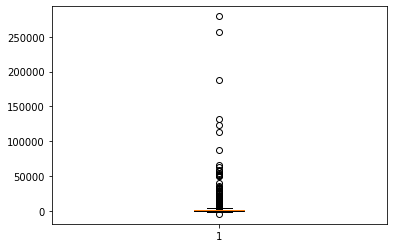

In [20]:
# Box Plot visualization of the Amount feature
plt.boxplot(RFM.Amount)


In [21]:
# outlier treatment for Amount using interquatile range
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7566dd948>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7566da0c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7566df588>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7566d6ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7566d37c8>],
 'means': []}

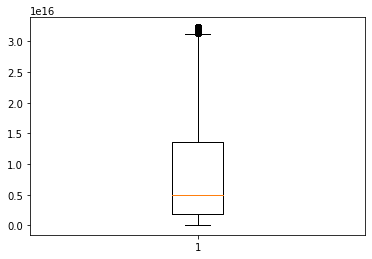

In [22]:
# Box Plot visualization of the Recency feature
plt.boxplot(RFM.Recency)


In [23]:
# outlier treatment for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1f756bc0548>,
 'caps': [<matplotlib.lines.Line2D at 0x1f756bc0e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f756bbbc48>],
 'medians': [<matplotlib.lines.Line2D at 0x1f756bc4d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f756bc9c08>],
 'means': []}

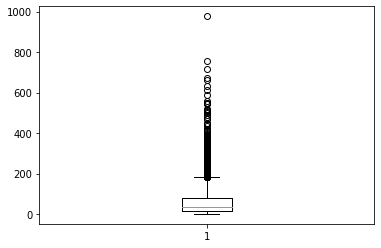

In [24]:
# Box Plot visualization of the Frequency feature
plt.boxplot(RFM.Frequency)


In [25]:
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

## * Feature Scaling
There are two most used methods for scaling our data, they are:
* Standardization  and
* Normalization

The purpose for this is such that distance-based algorithms like Kmeans or KNN use distance  to calculate the closeness or similarities between two data points. There are different distance metric such as Euclidean distance, Cosine etc. If the two data points are of different scales it is going to impact the final result or the performance of the model, so we need to place them on the same scales.

There is no hard and fast rule to tell you when to normalize or standardize your data.To understand the difference between Standardization and Normalization, you can check out this page on analyticsVidhya: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

There are different libraries in Scikit-learn to normalize our data such as MinMaxScaler etc..we are going to import the MinMaxScaler class from scikit learn and use the `fit_transform` method to scale the RFM data.



In [26]:
# standardise all parameters
RFM_norm = RFM.drop("CustomerID", axis=1)
RFM_norm.Recency = RFM_norm.Recency.dt.days

# create an object for the MixMaxScaler
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
RFM_norm = min_max.fit_transform(RFM_norm)

In [27]:
RFM_norm=pd.DataFrame(RFM_norm,columns=['Frequency','Amount','Recency'])

In [28]:
RFM_norm.head()

,Frequency,Amount,Recency
0,0.005556,0.308841,0.900277
1,0.166667,0.657391,0.204986
2,0.400000,0.649693,0.049861
3,0.088889,0.373693,0.855956
4,0.522222,0.608552,0.096953


## *  Determine the value of K-Clusters 
we are going to use the Elbow method to calculate the value of K

In [29]:
# sum of squared distances
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=50,n_init=10)
    kmeans.fit(RFM_norm)
    wcss.append(kmeans.inertia_)



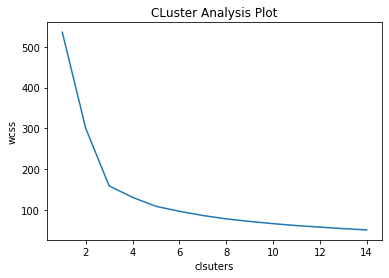

In [30]:
plt.plot(range(1,15),wcss)
plt.title('CLuster Analysis Plot')
plt.xlabel('clsuters')
plt.ylabel('wcss')
plt.show()

From the plot above,we can see that the curve flattens out at clusters=5, so we choose k=5 and fit our model with this value of k

In [31]:
RFM_norm.head()

,Frequency,Amount,Recency
0,0.005556,0.308841,0.900277
1,0.166667,0.657391,0.204986
2,0.400000,0.649693,0.049861
3,0.088889,0.373693,0.855956
4,0.522222,0.608552,0.096953


## * Carry out EDA( Exploratory Data Analysis) to understand our data

In [32]:
x=RFM_norm.iloc[:,[0,1]].values
x

array([[0.00555556, 0.30884115],
       [0.16666667, 0.65739071],
       [0.4       , 0.64969339],
       ...,
       [0.03333333, 0.32451506],
       [0.06666667, 0.34309025],
       [0.38333333, 0.66515591]])

### Creating Insights From the clusters formed

For anyone reading this, to get a better grasp as to what clustering is, centroid(clsuters_centers), "k-means++"(an initialization technique) etc. there is a free software tool we can play with clustering-like problem.
link:https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Below shows what clustering looks like(source:naftaliharris.com/blog/visualizing-k-means-clustering/)

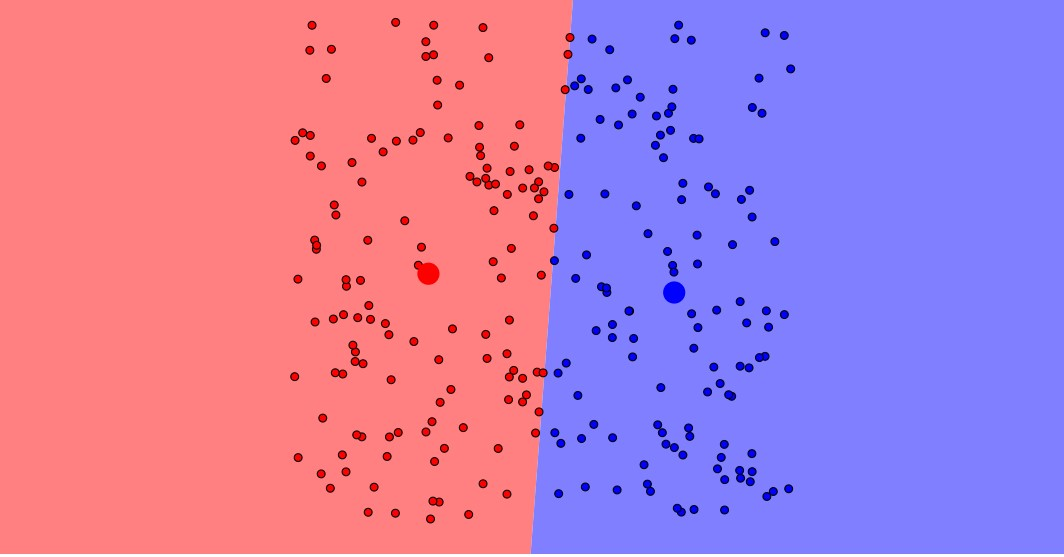

### visualizing the clusters formed between Frequency and Amount

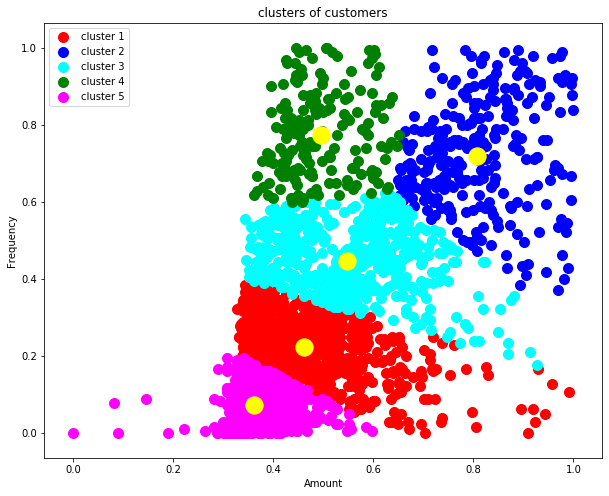

In [33]:

kmeans=KMeans(n_clusters=5,n_init=10,max_iter=50,init='k-means++',random_state=42)
Y_kmeans=kmeans.fit_predict(x)
plt.figure(figsize=(10,8))
plt.scatter(x[Y_kmeans==0,1],x[Y_kmeans==0,0],color='red',label='cluster 1',s=100)
plt.scatter(x[Y_kmeans==1,1],x[Y_kmeans==1,0],color='blue',label='cluster 2',s=100)
plt.scatter(x[Y_kmeans==2,1],x[Y_kmeans==2,0],color='cyan',label='cluster 3',s=100)
plt.scatter(x[Y_kmeans==3,1],x[Y_kmeans==3,0],color='green',label='cluster 4',s=100)
plt.scatter(x[Y_kmeans==4,1],x[Y_kmeans==4,0],color='magenta',label='cluster 5',s=100)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],s=300,color='yellow')
plt.title('clusters of customers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Commentary:
* cluster 1:customers in this category spends averagely but visits the store less frequently

* cluter 2: customers in this category spends most and visits the store often, so some sort of bonus/ discount should be given this customers to appreciate them and encourage them.

* cluster 3: The customers in this category spends averagely and visits the store on average

* cluster 4: This set of customer should also be a target because they spend averagely but visits the store often or very frequently

* cluster 5: this group of customers spends less and visits the store less often


In [34]:
#Grouping the customers based on Amount and Recency

y=RFM_norm.iloc[:,[1,2]].values
y

array([[0.30884115, 0.90027701],
       [0.65739071, 0.20498615],
       [0.64969339, 0.0498615 ],
       ...,
       [0.32451506, 0.49861496],
       [0.34309025, 0.01939058],
       [0.66515591, 0.11634349]])

### visualizing the clusters formed between Amount and recency

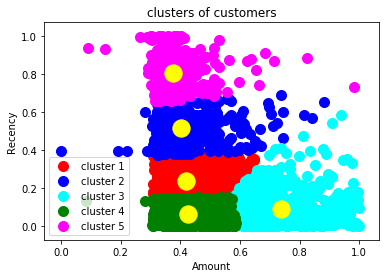

In [35]:

kmeans=KMeans(n_clusters=5,n_init=10,max_iter=50,init='k-means++',random_state=42)
Y_kmeans=kmeans.fit_predict(y)
plt.scatter(y[Y_kmeans==0,0],y[Y_kmeans==0,1],color='red',label='cluster 1',s=100)
plt.scatter(y[Y_kmeans==1,0],y[Y_kmeans==1,1],color='blue',label='cluster 2',s=100)
plt.scatter(y[Y_kmeans==2,0],y[Y_kmeans==2,1],color='cyan',label='cluster 3',s=100)
plt.scatter(y[Y_kmeans==3,0],y[Y_kmeans==3,1],color='green',label='cluster 4',s=100)
plt.scatter(y[Y_kmeans==4,0],y[Y_kmeans==4,1],color='magenta',label='cluster 5',s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,color='yellow')
plt.title('clusters of customers')
plt.xlabel('Amount')
plt.ylabel('Recency')
plt.legend()
plt.show()

### Commentary:

* cluster 1:customers in this category spends averagely but has not visited the store recently

* cluter 2: customers in this category spends averagely but has visited the store recntly.

* cluster 3: The customers in this category spent the most from the analysis but has not visited the store recently. 

* cluster 4: This set of customers doesn't spend much and has not visited the store in a long time

* cluster 5: this group of customers spends averagely and visits the store often/recently